# Predicting Price Using Regression

In this notebook we will be working on the data set on houses from King's county. The **aim** of the notebook is to build a **linear regression model** which can help us predict sales price of houses in King's county. During the process we hope to find interesting relationship between different variables and select features that are most useful in prediction. 

In order to begin analysis, the first thing we need to do is to set up our system by importing the appropriate libraries and the dataset we will be using.

In [1]:
# lets import a library which makes number crunching a easy task
import numpy as np

# since we will work with spreadsheet data we need a dataframe library
import pandas as pd 

# the following libraries will help with building linear regression model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy import stats
from scipy.stats import norm

# we will also import libraries for plotting our data
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# the following method from np will let us initialize random state to collect samples from our dataset
np.random.seed(0)


df = pd.read_csv('kc_house_data.csv')


In [2]:
# we will first try and get the big picture and understand what each of the columns mean
print("King's county data set has '{}' rows and '{}' columns".format(df.shape[0], df.shape[1]))
df.sample(10)

King's county data set has '21597' rows and '21' columns


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
156,6388930390,11/20/2014,650000.0,5,3.50,3960,25245,2.0,0.0,0.0,...,9,2500,1460.0,1996,0.0,98056,47.5250,-122.172,2640,13675
15572,2128000050,8/15/2014,625000.0,4,2.25,2070,7200,1.0,0.0,0.0,...,8,1390,680.0,1977,0.0,98033,47.6970,-122.169,2110,8400
2080,4401200350,2/10/2015,822500.0,3,2.50,3090,7708,2.0,0.0,0.0,...,10,3090,0.0,1999,0.0,98052,47.6868,-122.108,3140,8592
17522,3356402232,9/24/2014,179900.0,3,1.75,1230,12000,1.0,NaN,0.0,...,6,1230,0.0,1970,0.0,98001,47.2878,-122.251,1550,12000
8360,2212600100,5/22/2014,370000.0,4,2.75,3150,67518,1.0,NaN,0.0,...,9,2250,900.0,1965,0.0,98092,47.3382,-122.196,2210,32391
12832,9430110120,5/5/2015,737000.0,3,2.50,2300,7800,2.0,0.0,2.0,...,9,2300,0.0,1997,0.0,98052,47.6842,-122.155,2300,8187
17280,5126310470,1/15/2015,515500.0,4,2.75,2830,8126,2.0,0.0,0.0,...,8,2830,0.0,2005,NaN,98059,47.4863,-122.140,2830,7916
7583,8121100147,7/14/2014,390000.0,3,2.25,1640,2875,2.0,0.0,0.0,...,6,1240,400.0,1983,0.0,98118,47.5686,-122.286,1500,3960
19963,1085623710,7/14/2014,447055.0,4,2.50,2448,4949,2.0,0.0,0.0,...,9,2448,0.0,2014,0.0,98030,47.3428,-122.179,2815,5446
1754,3295610350,3/23/2015,850000.0,5,2.75,3430,15119,2.0,0.0,0.0,...,10,3430,0.0,1998,0.0,98075,47.5678,-122.032,3430,12045


In order to build our model we need to first understand our dataset and the variables that compose them. This dataset has 21597 observation and 21 columns. Out of these the ID has no predictive utility, apart from letting us know that it is the same property that is being sold again, and so we have 19 variables to work with. The data dictionary provides the following information about them

* **dateDate** - house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms/bedrooms
* **sqft_living** - square-footage of the home
* **sqft_lots** - square-footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

It is not very clear what each of them mean, but we can figure it out along the way. I have chosen to see a random sample from the dataset just so that I can be sure that the file was read correctly and to get an idea of what's going on with the data. It also helps me to check for any missing values in the dataset. 

Since I can see some missing values and '?' in the data I would like to carry out more analysis to see the datatype and number of non-null values. I would also like to get a summary of all of our variables.

In [3]:
# info() gives an overall snapshot of our data, and describe gives us a summary of its distribution
df.info()

# Instead of printing summary of all 21 variables its more cleaner to print only the variables which
# intuitively seem interesting
df[['price','sqft_living','sqft_lot']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,price,sqft_living,sqft_lot
count,2.159700e+04,21597.000000,2.159700e+04
mean,5.402966e+05,2080.321850,1.509941e+04
std,3.673681e+05,918.106125,4.141264e+04
min,7.800000e+04,370.000000,5.200000e+02
25%,3.220000e+05,1430.000000,5.040000e+03
50%,4.500000e+05,1910.000000,7.618000e+03
75%,6.450000e+05,2550.000000,1.068500e+04
max,7.700000e+06,13540.000000,1.651359e+06


Of all of the columns I am more interested in the square footage area and lot size of the property. From first assumption it would seem that they would be a good indicator of what the property is worth as unlike bedrooms or bathrooms it ca't be changed easily without a substantial financial investment. 

Since our data set doesnt contain any missing values in the **'sqft_living'** column, and its datatype is alright, it also doesnt have any value starting from 0. So I would like to explore its relationship with price on its own before I make any changes to the data set during preprocessing. 

We will be plotting a marginal plot as it will also allow us to see the distribution of **price** and **sqft_living** while also letting us see its relationship

Skewness and Kutosis for price data is '4.0234' and '34.5414'
Skewness and Kutosis for sqft_living is '1.4732' and '5.2521'


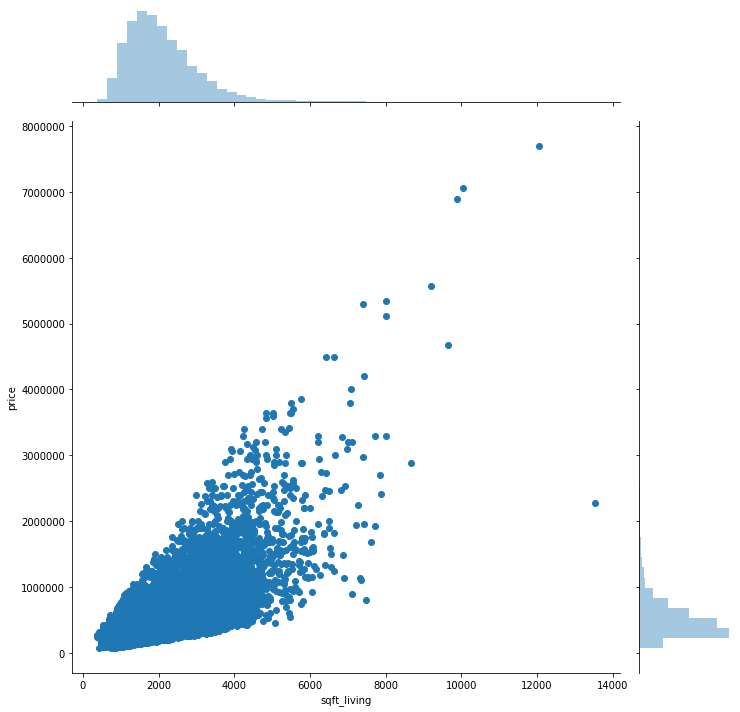

In [4]:
# create a joinplot using the seaborn library
sns.jointplot(x=df["sqft_living"], y=df["price"], kind='scatter', height= 10)

print("Skewness and Kutosis for price data is '{}' and '{}'".format(df['price'].skew().round(4), 
                                                                    df['price'].kurt().round(4)))

print(" ========================================================")

print("Skewness and Kutosis for sqft_living is '{}' and '{}'".format(df['sqft_living'].skew().round(4), 
                                                                     df['sqft_living'].kurt().round(4)))


We can note that both of the variables don't have a perfectly normal distribution, but they each have a positive skewness and show peakedness. Both these values are much higher in the price distribution. We may have to transform these variables to make them more normally distributed if it adds value otherwise we can keep them as it is.

It seems that they have a linear realtionship and so we can prepare to transform them and check how well they can be used to predict house prices. I will carry out the simple regression on both the original data and the normalized data to see if normalising the variables had any major significance.

### Normalising our variables.

We notice that price of house is deviating a lot from normal, but we can fix it by doing a simple data transformation. From my reading I have found out that in case of positive skewness we can perform a log transformation of the values. It can be done quite simply in few steps with the help of numpy.

In [5]:
# applying log transformation for both columns
# we create two additional columns to the dataframe

df['normal_price'] = np.log(df['price'])
df['normal_sqft_living'] = np.log(df['sqft_living'])

# lets check if everything went as expected
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,normal_price,normal_sqft_living
5080,3834500417,8/9/2014,469950.0,3,3.25,1760,1778,3.0,0.0,0.0,...,0.0,2008,0.0,98125,47.7201,-122.301,1520,1615,13.060382,7.473069
9385,5100403876,8/20/2014,840000.0,3,2.50,2060,9715,2.0,0.0,0.0,...,0.0,1924,2006.0,98115,47.6961,-122.316,1240,7072,13.641157,7.630461
12514,4038500330,4/7/2015,432000.0,3,1.75,1550,8134,1.0,0.0,0.0,...,0.0,1959,0.0,98008,47.6136,-122.121,1360,8000,12.976181,7.346010
7336,4289900005,12/30/2014,1540000.0,4,3.25,2850,4100,2.0,0.0,3.0,...,1030.0,1908,NaN,98122,47.6147,-122.285,2130,4200,14.247293,7.955074
17829,1005000062,8/1/2014,299000.0,2,1.00,1040,4600,1.0,0.0,0.0,...,0.0,1950,0.0,98118,47.5387,-122.277,1390,5897,12.608199,6.946976


Now that we have normalised our data we will plot the marginal plot once again and see if it made any difference to our data. Normalising won't effect the relationship but hopefully it should allow us to see it with less noise and clutter.

Skewness and Kutosis for normal_price data is '0.431' and '0.691'
Skewness and Kutosis for normal_sqft_living is '-0.0274' and '-0.079'


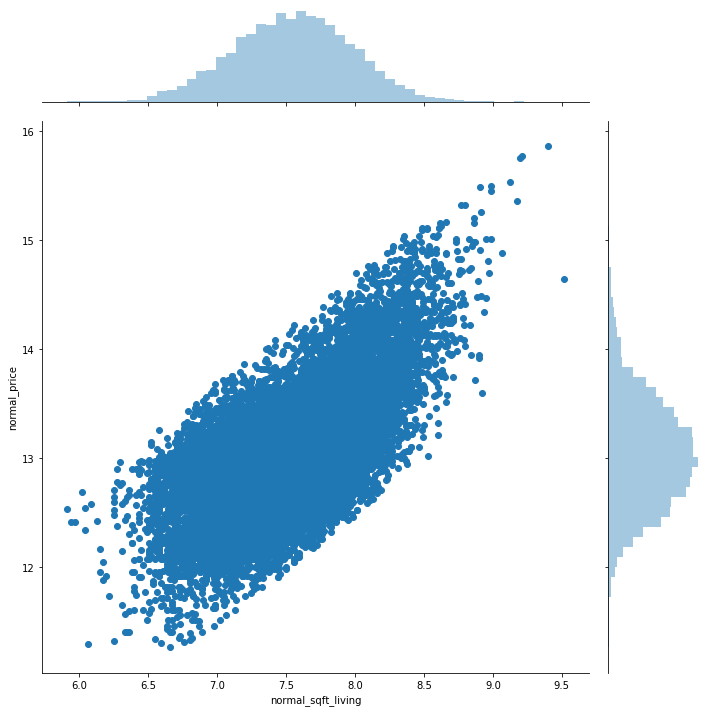

In [6]:
# we are calling the same plot function from seaborn libray

sns.jointplot(x=df["normal_sqft_living"], y=df["normal_price"], kind='scatter', height=10)
print("Skewness and Kutosis for normal_price data is '{}' and '{}'".format(df['normal_price'].skew().round(4), 
                                                                           df['normal_price'].kurt().round(4)))

print(" ========================================================")

print("Skewness and Kutosis for normal_sqft_living is '{}' and '{}'".format(df['normal_sqft_living'].skew().round(4), 
                                                                            df['normal_sqft_living'].kurt().round(4)))

Ok now that we ••transformed•• our data we can see that it shows signs of normal distribution with acceptable values for *Skewness* and *Kurtosis*.

We can therefore start builing our first ordinary least square regression model using statsmodel. We will first check the performance of our model using orginal data on price and sqft_living and then test it again using the log transformed data. It will help us decide whether it justifies using log-transformed variables. 

In [7]:
# first we set up our predictor (X) and target(y) variable
X = df['sqft_living']
y = df['price']

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance and understanding the LEARNED model
est_b = results.params
print(est_b.round(4), '\n')
print(results.summary())

const         -43988.8922
sqft_living      280.8630
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:40:55   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [8]:
# first we set up our predictor (X) and target(y) variable
X = df['normal_sqft_living']
y = df['normal_price']

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance and understanding the LEARNED model
est_b = results.params
print(est_b.round(4), '\n')
print(results.summary())

const                 6.7234
normal_sqft_living    0.8376
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:           normal_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:40:55   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

### Conclusions drawn from first analysis

I also printed the intercept and coefficient for the ordinary least square linear regression. By using these values and the below definition, we can estimate the house prices manually. The equation we use for our estimations is called hypothesis function and defined as

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x$$

Using OLS model on original data we can understand the following points:
* **A negative $\theta_{0}$** value: This is not suprising considering that the minimum living area we have in the data is 370 sq/ft. So if we plug that value into the equation we dont get a negative price. 
* Co-efficient of determination of 0.49: This would indicate that atleast in the following dataset around 49% of the variation in the response variable around its mean can be explained using this simple linear model.

Suprisingly by normalising the data we loose some of the predictive power afforded by sqft_living. We see that the r-squared value for orignal data is 0.493 but after normalising the data we get r2 of 0.455. Even though the difference is not a lot I would still prefer to keep the log-transformed columns around and check if it adds any value when we use multiple regression. Before we can begin that we will need to clean and process our data to get it ready for next stage of analysis.

## Cleaning our Data:

From the initial summary information we obtained about our data we noticed that some columns had missing value. We will have to explore that further and in order to understand what we can do about those missing values we will carry out a correlation matrix. The correlation matrix would help us to identify and direct our attention only towards the important features of our data. 

In [9]:
""" We need to first get a count of missing values in our dataset"""

# get the number of missing data points per column
df_miss = df.isnull().sum()

# look at the columns with more than 0 missing values
df_miss[df_miss > 0]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

While looking at sample data, we noticed that sqft_basement had lot of '?' values, so we will first try to get rid of them. Since only three columns have missing values, before we can approach to deal with the missing values in teh 3 columns I will chart a heatmap of correlation.

In [10]:
# the following code will allow us to keep only those data frame where sqft_basement is not '?'
# uncomment it if its required in analysis
#df = df[(df['sqft_basement'] != '?')]

# we will see if it really worked by doing a value count of sqft_basement column
df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

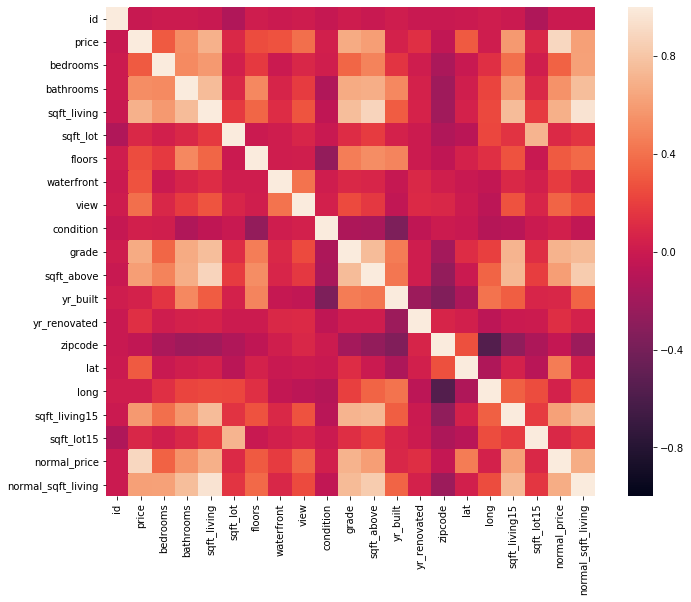

In [11]:
#correlation matrix
corrmat = df.corr()

# plot those correlation matrix as heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin= -1, vmax= 1, square=True);

We can see that there is many orange coloured squares showing relationship with price. The first one refers to 'bedrooms', 'bathrooms', sqft_living, grade, sqft_above. Actually, the correlation between these variables are so strong that it can indicate a situaton of multicollinearity. If we think about it most of these variables are conveying the same information, have high sqft may mean having more bedrooms for instance.

This heatmap shows too many variables, also many variables are categorical and so their correlation cannot be easily ascertained. Going further I will process the values to make sure they are of the required datatype. Since we have information on year built and the date the property was sold, we will also add another two columns, one on year sold and the other on age of property. 

#### Processing Data

In [12]:
# This will put the dataframe in their right data type
df['bedrooms'] = df['bedrooms'].astype('float64')

# uncomment if sqft_basement is required in analysis
#df['sqft_basement'] = df['sqft_basement'].astype('float64')

df.info() # just to check if it worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                    21597 non-null int64
date                  21597 non-null object
price                 21597 non-null float64
bedrooms              21597 non-null float64
bathrooms             21597 non-null float64
sqft_living           21597 non-null int64
sqft_lot              21597 non-null int64
floors                21597 non-null float64
waterfront            19221 non-null float64
view                  21534 non-null float64
condition             21597 non-null int64
grade                 21597 non-null int64
sqft_above            21597 non-null int64
sqft_basement         21597 non-null object
yr_built              21597 non-null int64
yr_renovated          17755 non-null float64
zipcode               21597 non-null int64
lat                   21597 non-null float64
long                  21597 non-null float64
sqft_living15         21597 non-null int64
sqft_lot15 

We can see that all columns are in their right datatype except for date. We dont have any plans of using it for any analysis and so we will keep it as it is for now. We will just slice the information on year sold from the date column to create our new column. 

In [13]:
# we slice the last four characters from the date column
df['year_sold'] = df['date'].map(lambda x: x[-4:])
# We will ensure that the type of our new column is an integer
df['year_sold'] = df['year_sold'].astype('int64')

In [14]:
# we create a new column called 'age' and assign it the value obtained by subtracting year built from sold
df = df.assign(age = lambda x: x['year_sold'] - x['yr_built'])
df.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,normal_price,normal_sqft_living,year_sold,age
16184,3028200080,3/24/2015,81000.0,2.0,1.0,730,9975,1.0,NaN,0.0,...,0.0,98168,47.4808,-122.315,860,9000,11.302204,6.593045,2015,72
3680,8564850300,9/12/2014,535000.0,3.0,3.0,2640,5978,2.0,NaN,0.0,...,NaN,98045,47.4759,-121.735,2680,6060,13.190022,7.878534,2014,2


### Deciding what to do with yr_renovated



We can still see null values in yr_renovated. Before we decide on removing the column or deleting the observation we will have a look at summary of its distribution.

In [15]:
print(df.yr_renovated.describe(), '\n')
print(df.yr_renovated.value_counts().head(1))

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64 

0.0    17011
Name: yr_renovated, dtype: int64


Year renovated has 16666 values containing '0'. From my understanding, year renovated can have an impact on deciding age of the house. For instance if a house is older than 100 years old then renovating it may make it look younger. Getting rid of the column therefore doesnt make sense as it can be used to add value to our estimate of age of the property. 0 basically means the plot was never renovated, since vast majortity of the population was never renovated it would be better if I replace the null value with the median of '0'. It wont remove any information but will help in adding new information by giving us a corrected age variable. 

First we will make sure that all values in **age** column makes sense and there are no negative values. Negative age may mean the property was sold while it was still under construction. Although its perfectly normal to have such properties we would like this model to predict house prices for properties that have already been built. So we will get rid of any negative value in age if they are few in number. After dropping negative age we can then fill null values in yr_renovated with '0'

In [16]:
df.age.unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1])

In [17]:
# we will drop all those observations that have negative age
df = df[df.age != -1]

# we fill null values in yr_renovated
df.yr_renovated.fillna(0, inplace=True)
df['age_adj'] = df['age'].map(lambda x: x) # we create a new column
df[df.yr_renovated > 0] = df[df.yr_renovated > 0].assign(age_adj = lambda x: x['year_sold'] - x['yr_renovated'])

# we ensure that there is no negative value
df = df[df.age_adj != -1]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21579 entries, 0 to 21596
Data columns (total 26 columns):
id                    21579 non-null int64
date                  21579 non-null object
price                 21579 non-null float64
bedrooms              21579 non-null float64
bathrooms             21579 non-null float64
sqft_living           21579 non-null int64
sqft_lot              21579 non-null int64
floors                21579 non-null float64
waterfront            19205 non-null float64
view                  21516 non-null float64
condition             21579 non-null int64
grade                 21579 non-null int64
sqft_above            21579 non-null int64
sqft_basement         21579 non-null object
yr_built              21579 non-null int64
yr_renovated          21579 non-null float64
zipcode               21579 non-null int64
lat                   21579 non-null float64
long                  21579 non-null float64
sqft_living15         21579 non-null int64
sqft_lot15 

## Finding new features to improve our model

Now that we are done cleaning and processing our data, we will try to find out new features we can use to build our multiple regression model. Without making much assumptions about the feature, we thought it would be better to look at houses that share the same area. So far we know that living area can answer around 50% of the variance of the response variable, and so to identify more factors lets look at houses where living area is a constant and check what factors are influencing price for those houses.

Luckily for us the dataset contains many houses that share same area. We will only look at those areas which are repeated atleast over a 100 times in different houses, to check if we see any feature which is repeatedly correlated with price. We can then use them in our model and check how they perform.

In [19]:
# first we check the instances where the area is same between properties
(df.sqft_living.value_counts() > 100).sum()

53

There are 50 instances where there are sqft_living area have value counts of over 100. This means that there there were more than 100 obserbvations associated with each of those area. We will create subsets of those data and check the first 5 factors that are most correlated with price. We will then plot charts to visualise that relationship further.

In [20]:
# we first create a new data frame where normal_price and normal_sqft_living is dropped
# this will allow us to see correlation with other features to indentify interesting ones

df_1 = df.drop(['normal_price', 'normal_sqft_living'], axis = 1)
df_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age,age_adj
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,59.0
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,23.0
2,5631500400,2/25/2015,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,82.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,49.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,28.0


For living area of 1580 sqft, the corr-matrix is:


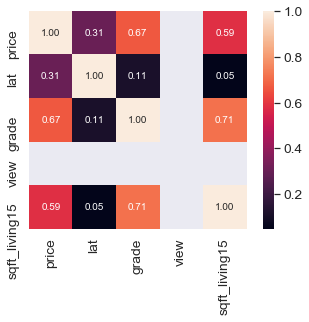

For living area of 2020 sqft, the corr-matrix is:


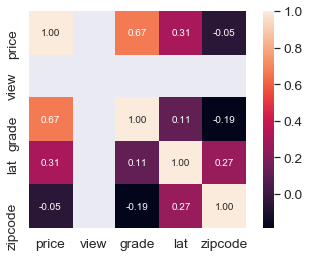

In [21]:
# first we identify all living area that repeat over 100 times. 
# Since there were 50 of them we sort the values and call for first 50 values to our list
sqft_repeating = sorted(list(df.sqft_living.value_counts().head(50).index), reverse=True)

# set how many subsets we wannt to check
k = 2


for i in range(k):
    """
    The following loop runs k number of times and it plots a correlation matrix of randomly selected subsets containing
    the repeated sqft_living area. In order to keep this less messy it plots only the first 5 correlated features with 
    price. We can change the number by changing the value of 'num' variable inside the for loop.

    """
    elem = np.random.choice(sqft_repeating)
    print('For living area of {} sqft, the corr-matrix is:'.format(elem))
    corrmat = df_1[df_1.sqft_living == elem].corr()
    num = 5
    cols = corrmat.nlargest(num, 'price')['price'].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

The first thing we notice is that, when the living area is constant then **lat** seems to be correlated with price. Althought the correlation is not large but it is the highest when compared to all the other available features. The other features that catches our attention is the correlation with **age** and **grade**. 

We will plot some visuals to see the relationship between these features more clearly. We will just work with our orignal dataset

## How does price change on the basis of lat and age


We again follow the same logic we did before. We create susbsets of data where the living area presented in **sqft_living** column is kept as a constant and we plot the relationship with latitude. In order to keep this notebook free from clutter we will just plot randomly selected sqft area.

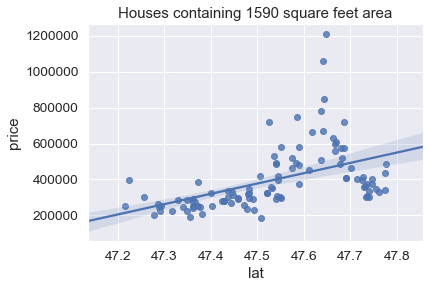

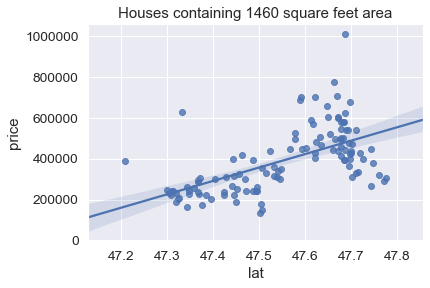

In [22]:
k = 2
for i in range(k):
    """
    The following loop runs k number of times and it plots a regression plot of randomly selected subsets containing
    the repeated sqft_living area. We can plot more figures by changing the value of variable 'k'

    """
    elem = np.random.choice(sqft_repeating)
    plt.figure()
    plt.title("Houses containing {} square feet area".format(elem))
    sns.regplot(df[df.sqft_living == elem].lat, df[df.sqft_living == elem].price)
    plt.show()

From these plots it seems that consistently some houses between latittude of 47.5 ro 47.7 sell at a higher prices, Age of the house or year built was shown as highly correlated in heat map that we plotted earlier so we decided to frist plot a regplot to see relationship and then plot the effect of lat and age on price using a bubble chart.

The size of the bubble corresponds with the age of the house. Smaller bubbles indicating younger houses while the colour of the bubble corresponds to the number of houses that are associated with the following latitude. 

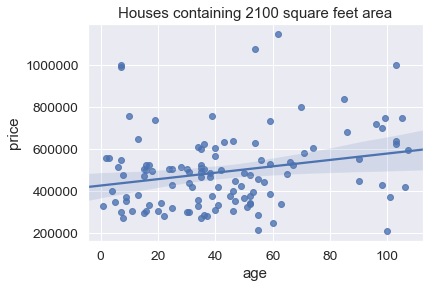

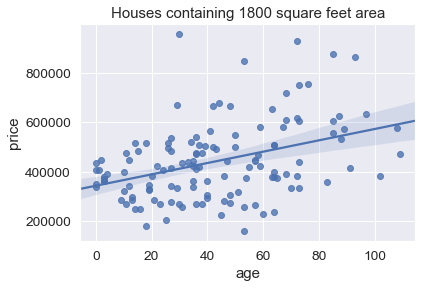

In [23]:
k = 2
for i in range(k):
    """
    The following loop runs k number of times and it plots a regression plot of randomly selected subsets containing
    the repeated sqft_living area. We can plot more figures by changing the value of variable 'k'

    """
    elem = np.random.choice(sqft_repeating)
    plt.figure()
    plt.title("Houses containing {} square feet area".format(elem))
    sns.regplot(df[df.sqft_living == elem].age, df[df.sqft_living == elem].price)
    plt.show()

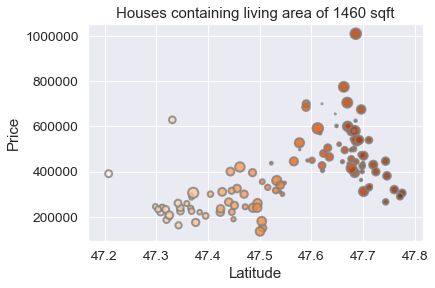

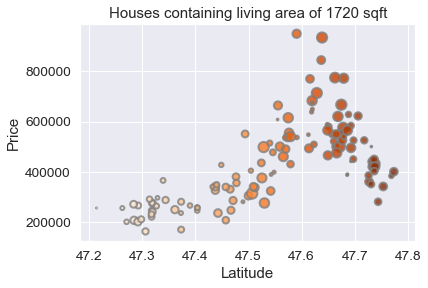

In [24]:
k = 2
for i in range(k):
    """
    The following loop runs k number of times and it plots a regression plot of randomly selected subsets containing
    the repeated sqft_living area. We can plot more figures by changing the value of variable 'k'

    """
    elem = np.random.choice(sqft_repeating)
    x = df[df.sqft_living == elem].lat
    y = df[df.sqft_living == elem].price
    z = df[df.sqft_living == elem].age
    
    plt.scatter(x, y, s=z, c=x, cmap="Oranges", alpha=0.8, edgecolors="grey", linewidth=2) 
    plt.xlabel("Latitude")
    plt.ylabel("Price")
    plt.title('Houses containing living area of {} sqft'.format(elem))
 
    plt.show()


Through these two plots we learn that many houses that share the same living area differ in their prices based on that latitude. We also noticed that older houses tended to get sold at a higher prices compared to younger ones. The adjusted age gives a negative relation maybe as the adjusted age decreases the age of the property based on renovation. 

Since compared to other features, lat and age seem to be consistenly correlated we assume that it would be better if we keep them in our final regression model.

## Effect of grade, condition and number of Bedrooms on prices with same area

In [25]:
# list containg features of interest
columns = ['bedrooms', 'bathrooms', 'condition', 'grade']
k = 5
for i in range(k):
    elem = np.random.choice(sqft_repeating) # choose a random element from the sqft_repeating list
    print('For houses with {} sqft area:'.format(elem))
    for col in columns: # using boolean to only susbet data based on meeting the condition
        print('The corr between price and {} is'.format(col), df[df.sqft_living == elem].corr()['price'][col].round(4))
    print('\n')

For houses with 1590 sqft area:
The corr between price and bedrooms is 0.0471
The corr between price and bathrooms is 0.0801
The corr between price and condition is 0.0079
The corr between price and grade is 0.4742


For houses with 2000 sqft area:
The corr between price and bedrooms is -0.0603
The corr between price and bathrooms is -0.0942
The corr between price and condition is 0.208
The corr between price and grade is 0.3561


For houses with 1500 sqft area:
The corr between price and bedrooms is -0.1108
The corr between price and bathrooms is -0.0795
The corr between price and condition is 0.1518
The corr between price and grade is 0.4004


For houses with 1580 sqft area:
The corr between price and bedrooms is -0.1829
The corr between price and bathrooms is -0.0637
The corr between price and condition is -0.0916
The corr between price and grade is 0.4599


For houses with 2040 sqft area:
The corr between price and bedrooms is -0.1274
The corr between price and bathrooms is -0.3175

What we learn from these values is that **grade** seems to be a better predictor of price compared to **condition**. This may make us believe that if we have to select between two houses that have the same **area** then the house with a better grade might be a good option as they seem to be correlated with price. 

Another interesting thing we see that adding a extra bedroom doesnt necessarily make the property more expensive. Instead on many occasion it can have a negative effect. We will plot and see a general effect of grade on the overall data set to see the relationship more clearly. We will then decide we can add grade into our final model of liner regression.

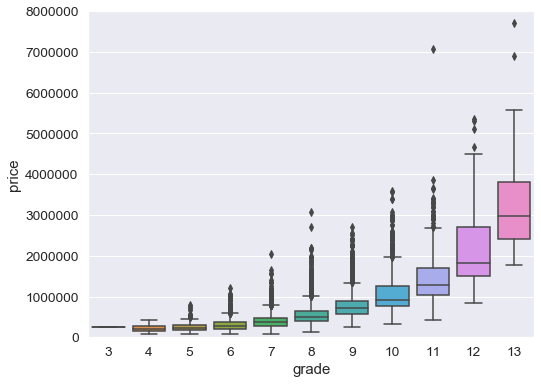

In [26]:
#box plot for grade v/s price
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

## Building our final regression model


In [28]:
df1 = df.loc[:,]

data = df1.loc[:,['normal_price', 'normal_sqft_living', 'age','lat']]
x = data.drop('normal_price', axis=1)
y = data['normal_price']
x = sm.add_constant(x)
model_sm = sm.OLS(y,x)
results = model_sm.fit()
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))
est_b = results.params
print(est_b.round(4))
print(results.summary())

R2 = 0.64
const                -67.1257
normal_sqft_living     0.8639
age                    0.0018
lat                    1.5469
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           normal_price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                 1.300e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:41:00   Log-Likelihood:                -5643.9
No. Observations:               21579   AIC:                         1.130e+04
Df Residuals:                   21575   BIC:                         1.133e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|   

In [27]:
df1 = df.loc[:,:]

data = df1.loc[:,['normal_price', 'normal_sqft_living','grade', 'age','lat']]
x = data.drop('normal_price', axis=1)
y = data['normal_price']
x = sm.add_constant(x)
model_sm = sm.OLS(y,x)
results = model_sm.fit()
r2 = results.rsquared
r2 = r2.round(2)
# Evaluating performance and understanding the LEARNED model
est_b = results.params
print(est_b.round(4), '\n')
print(results.summary())

const                -55.3075
normal_sqft_living     0.4760
grade                  0.2139
age                    0.0039
lat                    1.3237
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:           normal_price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 1.481e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:41:00   Log-Likelihood:                -2535.5
No. Observations:               21579   AIC:                             5081.
Df Residuals:                   21574   BIC:                             5121.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err   